# Fuel Efficiency of American Cars Produced From 1970-1982

## Introduction
<div style="line-height: 1.5; font-size: 16px;">
The goal of this analysis is to examine the fuel efficiency of vehicles manufactured from 1970-1982, look at the changes over time and to determine if there are correlations between fuel efficiency and  the manufacturing region and/or the horsepower of the vehicle. 
</div>


#### Summary of Findings
<div style="line-height: 1.5; font-size: 16px;">
During this time period, vehicles produced in the US where significantly less fuel efficient than those produced in Europe or Japan with Japan producing 
the most fuel efficient vehicles, on average 1/3 more efficient that the vehicles produced in the US.  The vehicles with the highest horsepower 
where generally the least fuel efficient. Throughout the sample 12 year period, fuel efficiency improved considerably world-wide.  This is likely a 
response to the oil crisis of the 1970s which increased oil prices and prompted a heightened awareness of the importance of energy conservation.  
In addition, in the US, the U.S., the Corporate Average Fuel Economy (CAFE) standards were introduced in 1975 as a response to the energy crisis. 
CAFE standards mandated a certain level of fuel efficiency for automakers, requiring them to achieve a specified average fuel economy across their fleets. 
Despite the increases in fuel efficiently, US manufactured cars remained, on average, considerably less fuel efficient than vehicles produced in 
Europe and Japan with very little change in standing between the beginning and end of this time period. 
</div>



#### Notes On the Data Source
<div style="line-height: 1.5; font-size: 16px;">
The data source for this report is a publicly available dataset that is meant to be used to sample purposes only. It is not necessarily a fully accurate 
and comprehensive list of all vehicles produced between 1970-1982.  
</div>

In [316]:
import seaborn as sns
import pandas as pd
from IPython.display import display, Markdown

mpg = pd.read_csv("C:\Personal Docs - Local Only\Tech Projects\Continuing Education\CourseCareers Data Analyst\python\mpg.csv", sep=',')

#add a new field separating the care manufacturer from manufacturer/model field
mpg["manufacturer"] =  mpg["name"].str.split().str[0]



# capitolize the first letter of the origin unless it's usa, then capitoloze the entire field
def custom_capitalize(value):
    if value.lower() != 'usa':
        return value.capitalize()
    else:
        return value.upper()

mpg['origin'] = mpg['origin'].apply(lambda x: custom_capitalize(x))

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino,ford


## Data Vizualizations

<div style="line-height: 1.5; font-size: 16px;">
The tables below show the average fuel efficacy by the manufacturing country.  In the first table we see that for the entire period between 1970-1982, cars made in Japan tended to be the most fuel efficient followed closely by Europe. Cars originating in the US where the least fuel efficiency, 1/3 less efficient on average than cars made in Japan.  The second table shows that while there were improvements in fuel efficiency over the time period worldwide, vehicles produced in the US remained, on average, close to 1/3 less efficient than vehicles produced in Japan in the last part of this time period. 
</div>

### Fuel Efficiency By Manufacturing Region 1970-1982

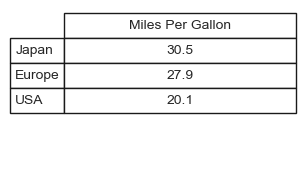

In [329]:
#prepare the dataframe for the full time period
country_effeciency = pd.DataFrame(mpg.groupby(by="origin")["mpg"].mean().sort_values(ascending=False))
country_effeciency["mpg"] = country_effeciency["mpg"].round(1)

# format and display  table for full time period
fig, ax = plt.subplots(figsize=(3, 2))
ax.axis('off')  # Hide the axes

table = ax.table(cellText=country_effeciency.values,
                 colLabels=["Miles Per Gallon"],
                 rowLabels=country_effeciency.index,
                 cellLoc = 'center',
                 loc='upper center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5) 

title = "Fuel Efficiency By Manufacturing Region 1970-1982"
display(Markdown(f"### {title}"))
plt.show() 



### Fuel Efficiency By Manufacturing Region 1977-1982

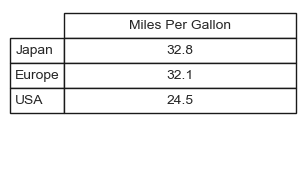

In [330]:

#prepare the dataframe for the 1977 - 1982
mpg_end = mpg[mpg["model_year"] >=77]
country_effeciency_end = pd.DataFrame(mpg_end.groupby(by="origin")["mpg"].mean().sort_values(ascending=False))
country_effeciency_end["mpg"] = country_effeciency_end["mpg"].round(1)

# format and display  table for 1977-1982
fig, ax = plt.subplots(figsize=(3, 2))
ax.axis('off')  # Hide the axes

table = ax.table(cellText=country_effeciency_end.values,
                 colLabels=["Miles Per Gallon"],
                 rowLabels=country_effeciency_end.index,
                 cellLoc = 'center',
                 loc='upper center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5) 

title = "Fuel Efficiency By Manufacturing Region 1977-1982"
display(Markdown(f"### {title}"))

plt.show() 


<div style="line-height: 1.5; font-size: 16px;">
Looking at the number of different makes/models of vehicles produced in each region, we can see that almost half of the top 20 most fuel efficient makes/models of vehicles
manufactured between 1970-1982 originated in Japan. The US was responsible for producing 28% of the top 20 most fuel efficient makes/models which was slightly better than
the number produced in Europe. While this shows some commitment by the US to fuel efficient vehicles, it is likely outweighed by the fact that the US is responsible for producing 100% of the top 20 least fuel efficient makes/models of vehicles between 1970-1982.
</div>

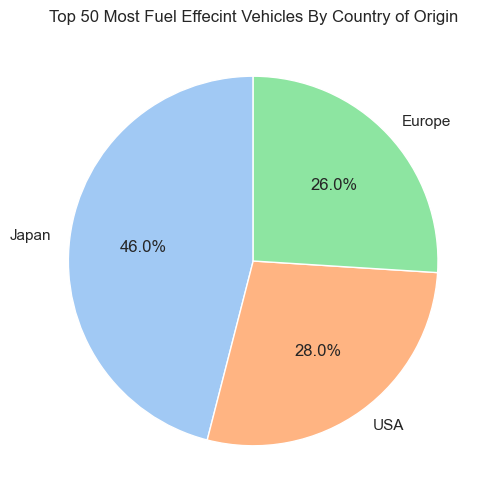

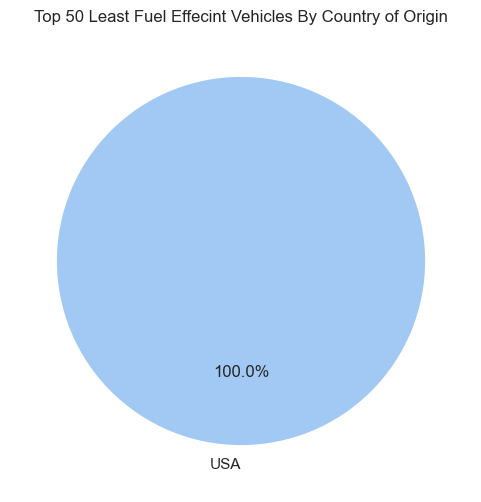

In [295]:
#sort the data and count values
top_20_by_country = mpg.sort_values(by='mpg', ascending=False).head(50)
bottom_20_by_country = mpg.sort_values(by='mpg', ascending=True).head(50)

top_record_count = top_20_by_country['origin'].value_counts()
bottom_record_count = bottom_20_by_country['origin'].value_counts()

# Set the style and display pie charts
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

plt.pie(top_record_count, labels=top_record_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 50 Most Fuel Effecint Vehicles By Country of Origin')
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(bottom_record_count, labels=bottom_record_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 50 Least Fuel Effecint Vehicles By Country of Origin')
plt.show()


<div style="line-height: 1.5; font-size: 16px;">
When we look at the relationship between horsepower and fuel efficiency, we can see that while there are some variations among different vehicles, overall vehicles with more horsepower tend to be less fuel efficient.
</div>

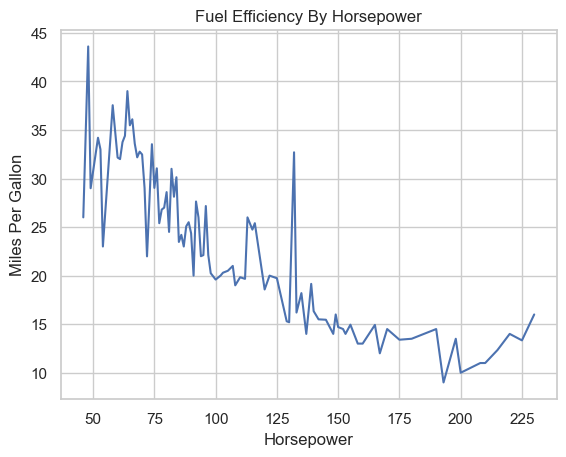

In [131]:
#create data frame with the proper grouping and add to graph
effeciency_horsepower = pd.DataFrame(mpg.groupby(by="horsepower")["mpg"].mean())
effeciency_horsepower = effeciency_horsepower.reset_index()
sns.lineplot(data=effeciency_horsepower, x="horsepower",y="mpg")

# Add labels, style, and title, show the plot
sns.set(style="whitegrid")
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.title('Fuel Efficiency By Horsepower')
plt.show()

<div style="line-height: 1.5; font-size: 16px;">
Throughout the 70's and into the early 80's, the average horsepower of cars being produced declined significantly 
which is likely an important contributing factor to the the average fuel efficiency of vehicles produced in the same time 
period increasing 56% percent.
</div>

### Horsepower vs. Fuel Efficiency Over Time

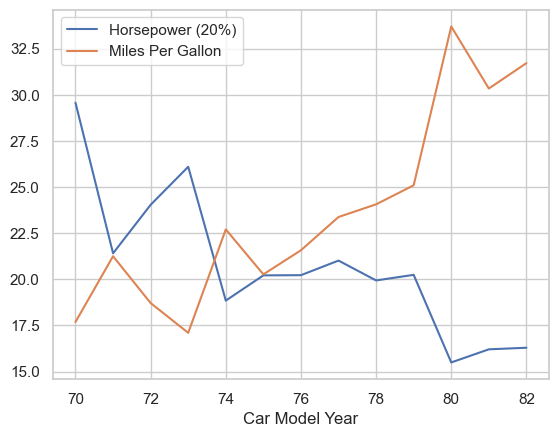

In [336]:
#create data frame with the proper grouping and add to graph
horsepower_over_time = pd.DataFrame(mpg.groupby(by="model_year")["horsepower"].mean() /5)
effeciency_over_time = pd.DataFrame(mpg.groupby(by="model_year")["mpg"].mean())

sns.lineplot(x="model_year", y="horsepower", data=horsepower_over_time, label="Horsepower (20%)")
sns.lineplot(x="model_year", y="mpg", data=effeciency_over_time, label="Miles Per Gallon")

# Add labels, legend, and title, show the plot
plt.xlabel("Car Model Year")
plt.ylabel("")
#plt.title("Horsepower vs. Fuel Efficiency Over Time")


title = "Horsepower vs. Fuel Efficiency Over Time"
display(Markdown(f"### {title}"))

plt.legend()
plt.show()

